'Before Filtering the shape (2999942, 25)'

'After Filter the shape (166502, 25)'

'Desire Filter shape (166502, 6)'

Schema([('Out_of_home_qty_000', Int16),
        ('Out_of_home_value_rs', Int16),
        ('Total_consumption_qty_000', Int16),
        ('Total_consumption_value_rs', Int16),
        ('Source_8_1', Int16),
        ('Multiplier', Int16)])

Percentage of null values 
Out_of_home_qty_000 ---> 82.18%
Out_of_home_value_rs ---> 73.10%
Total_consumption_qty_000 ---> 16.90%
Total_consumption_value_rs ---> 0.00%
Source_8_1 ---> 50.22%
Multiplier ---> 91.13%


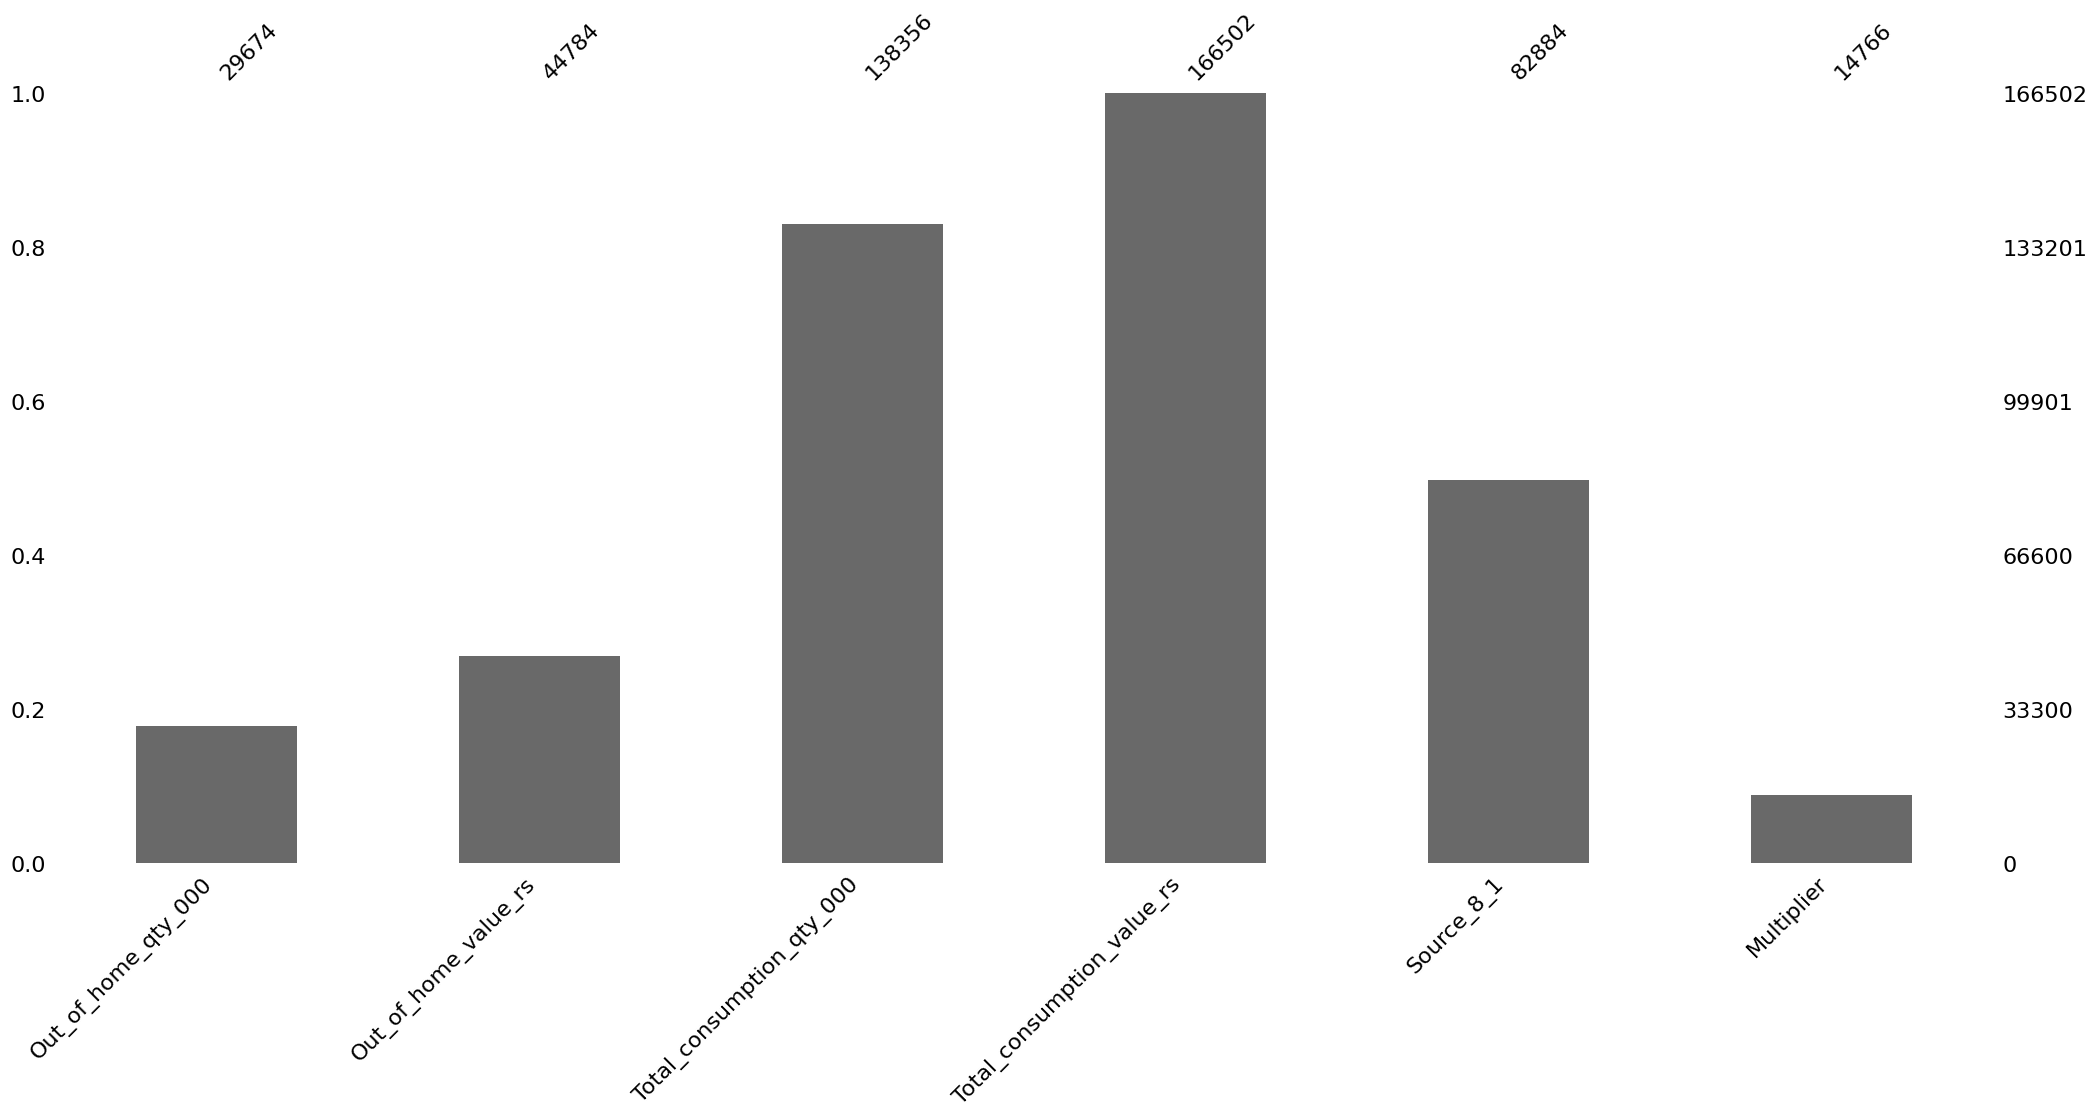

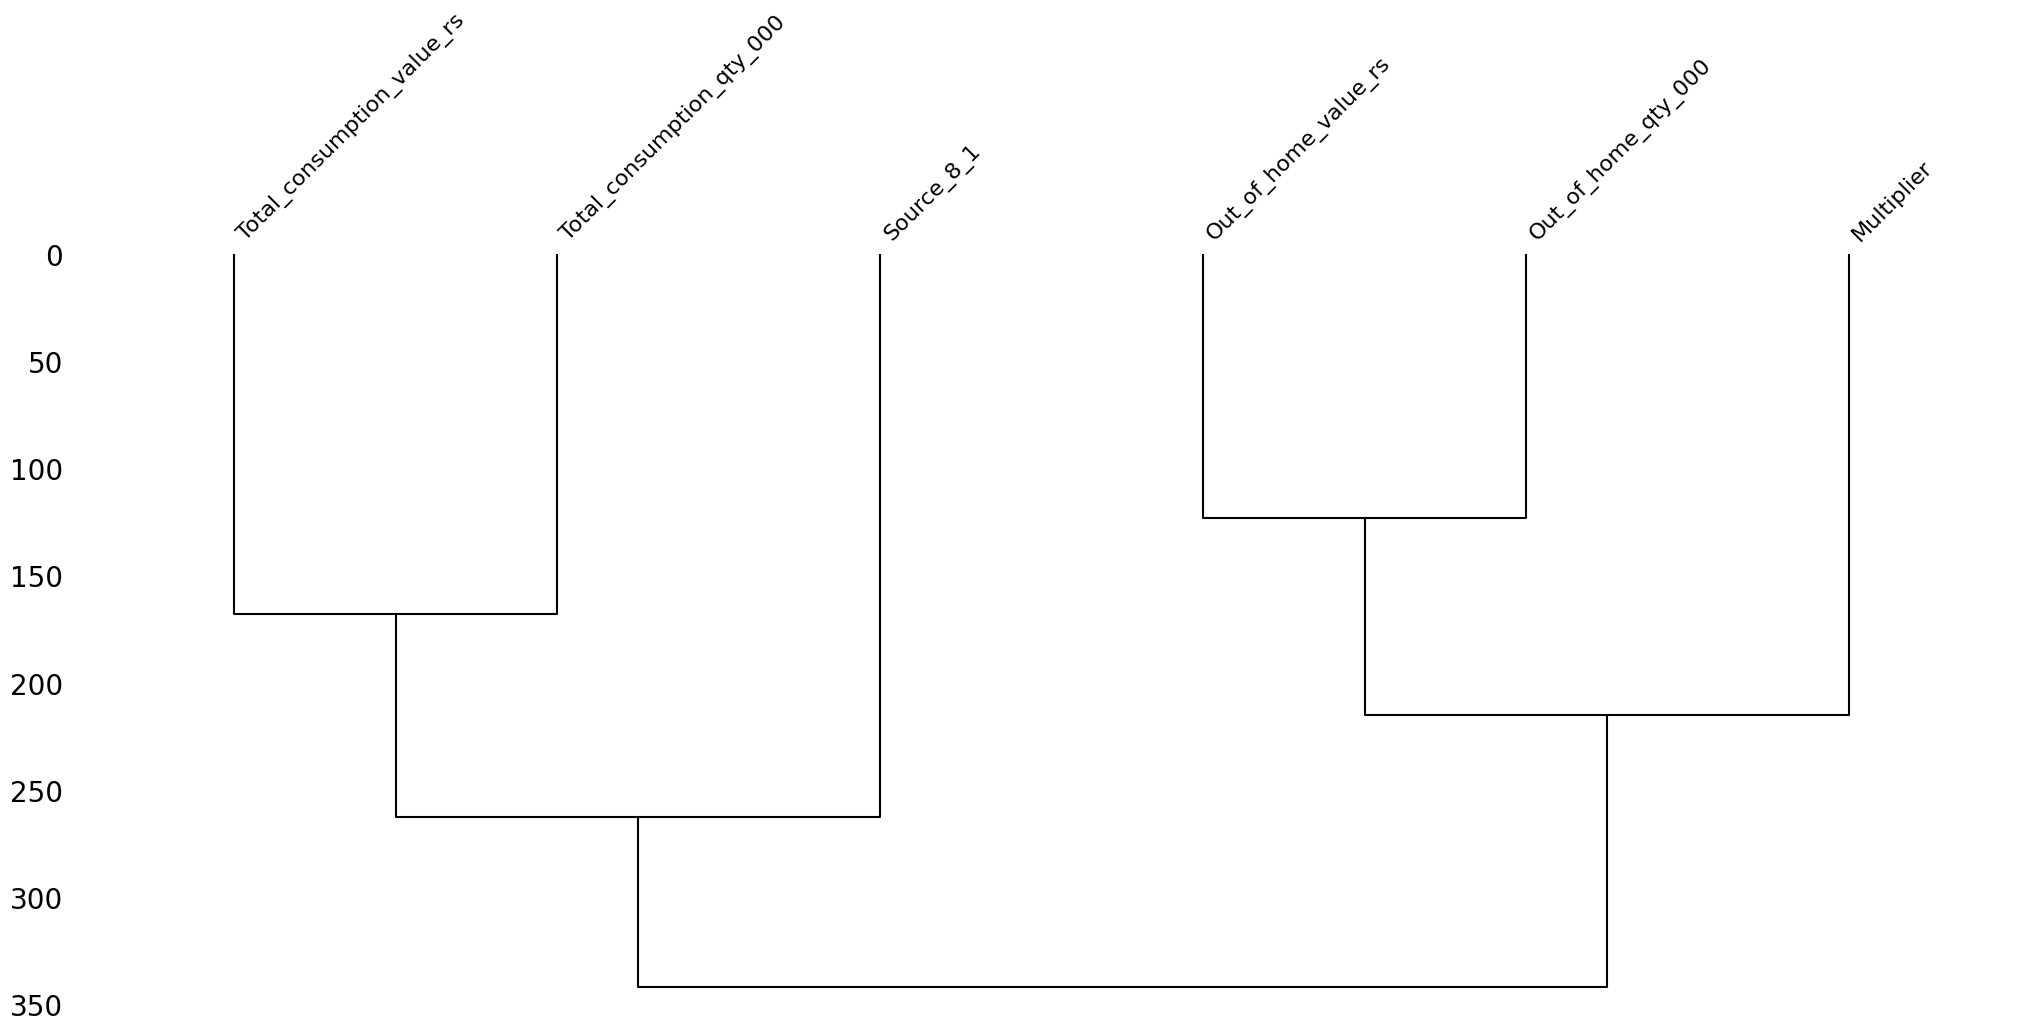

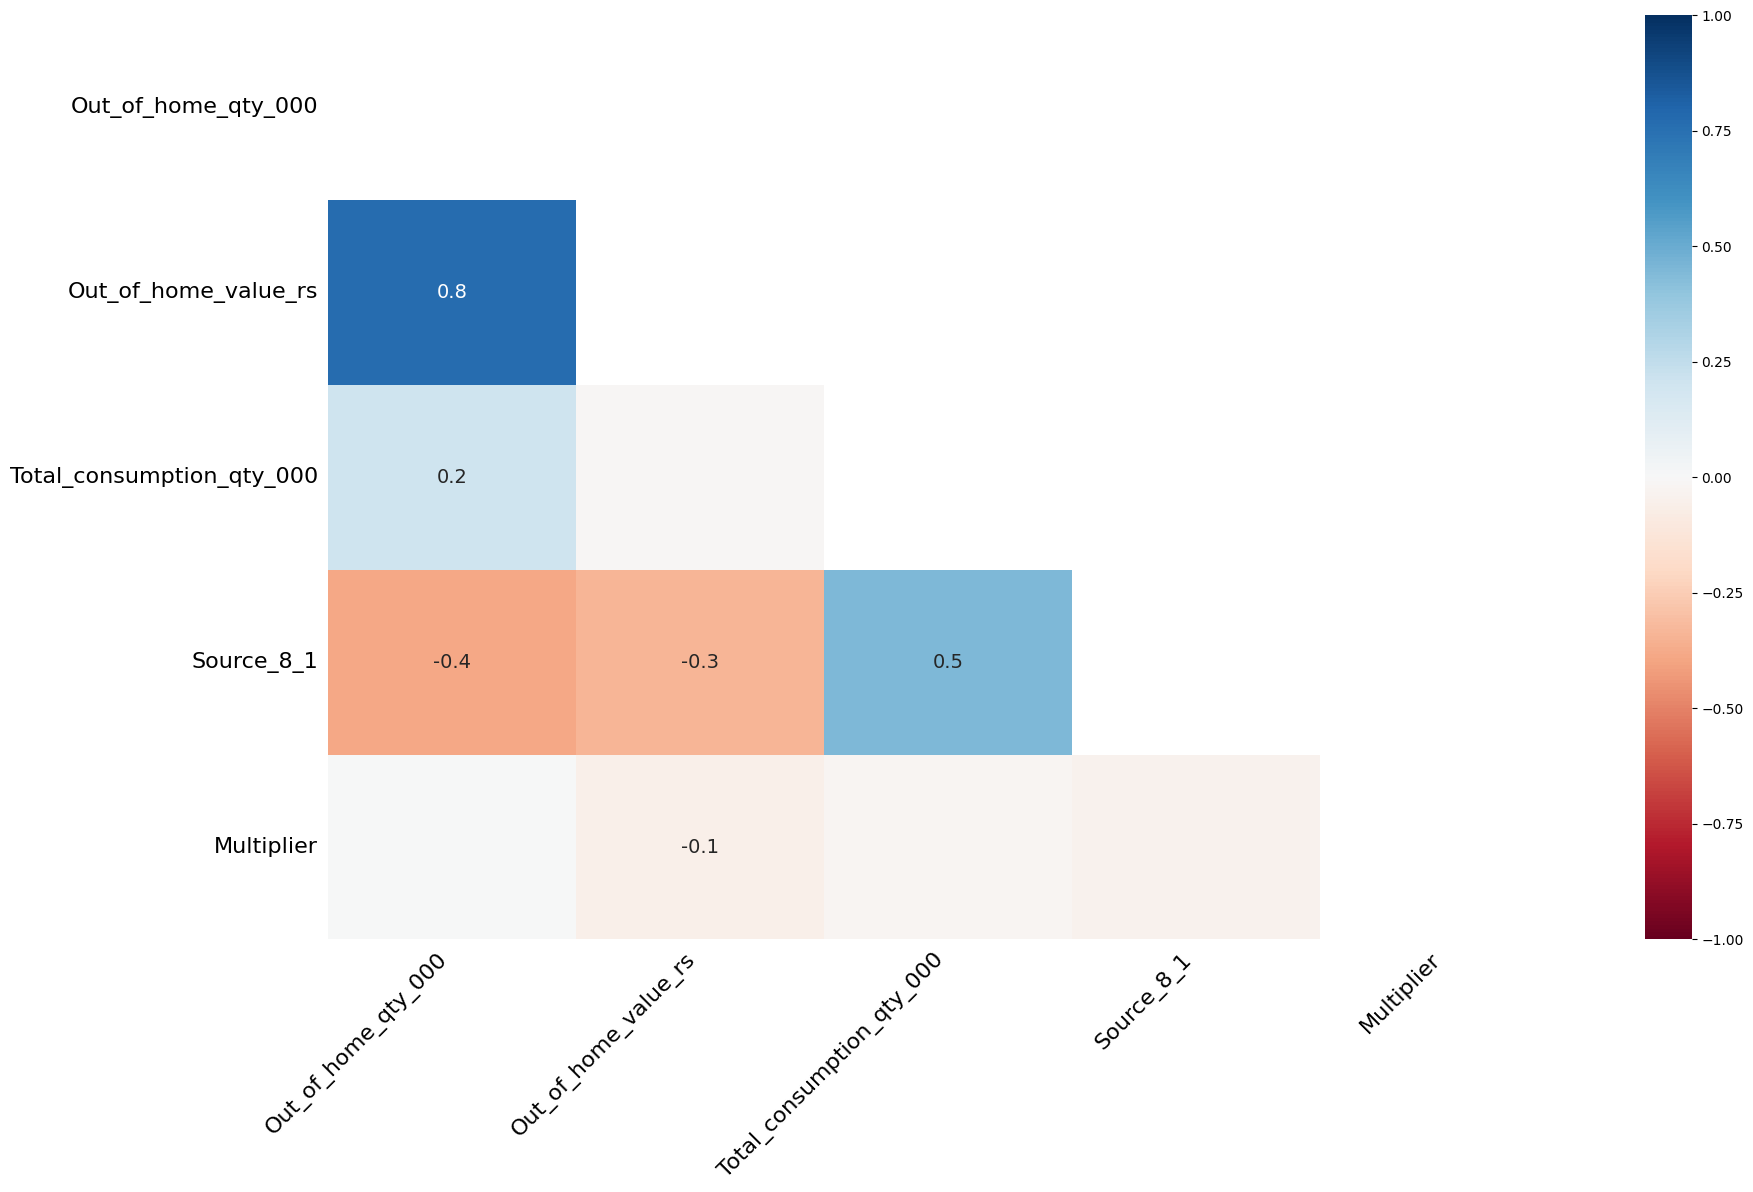

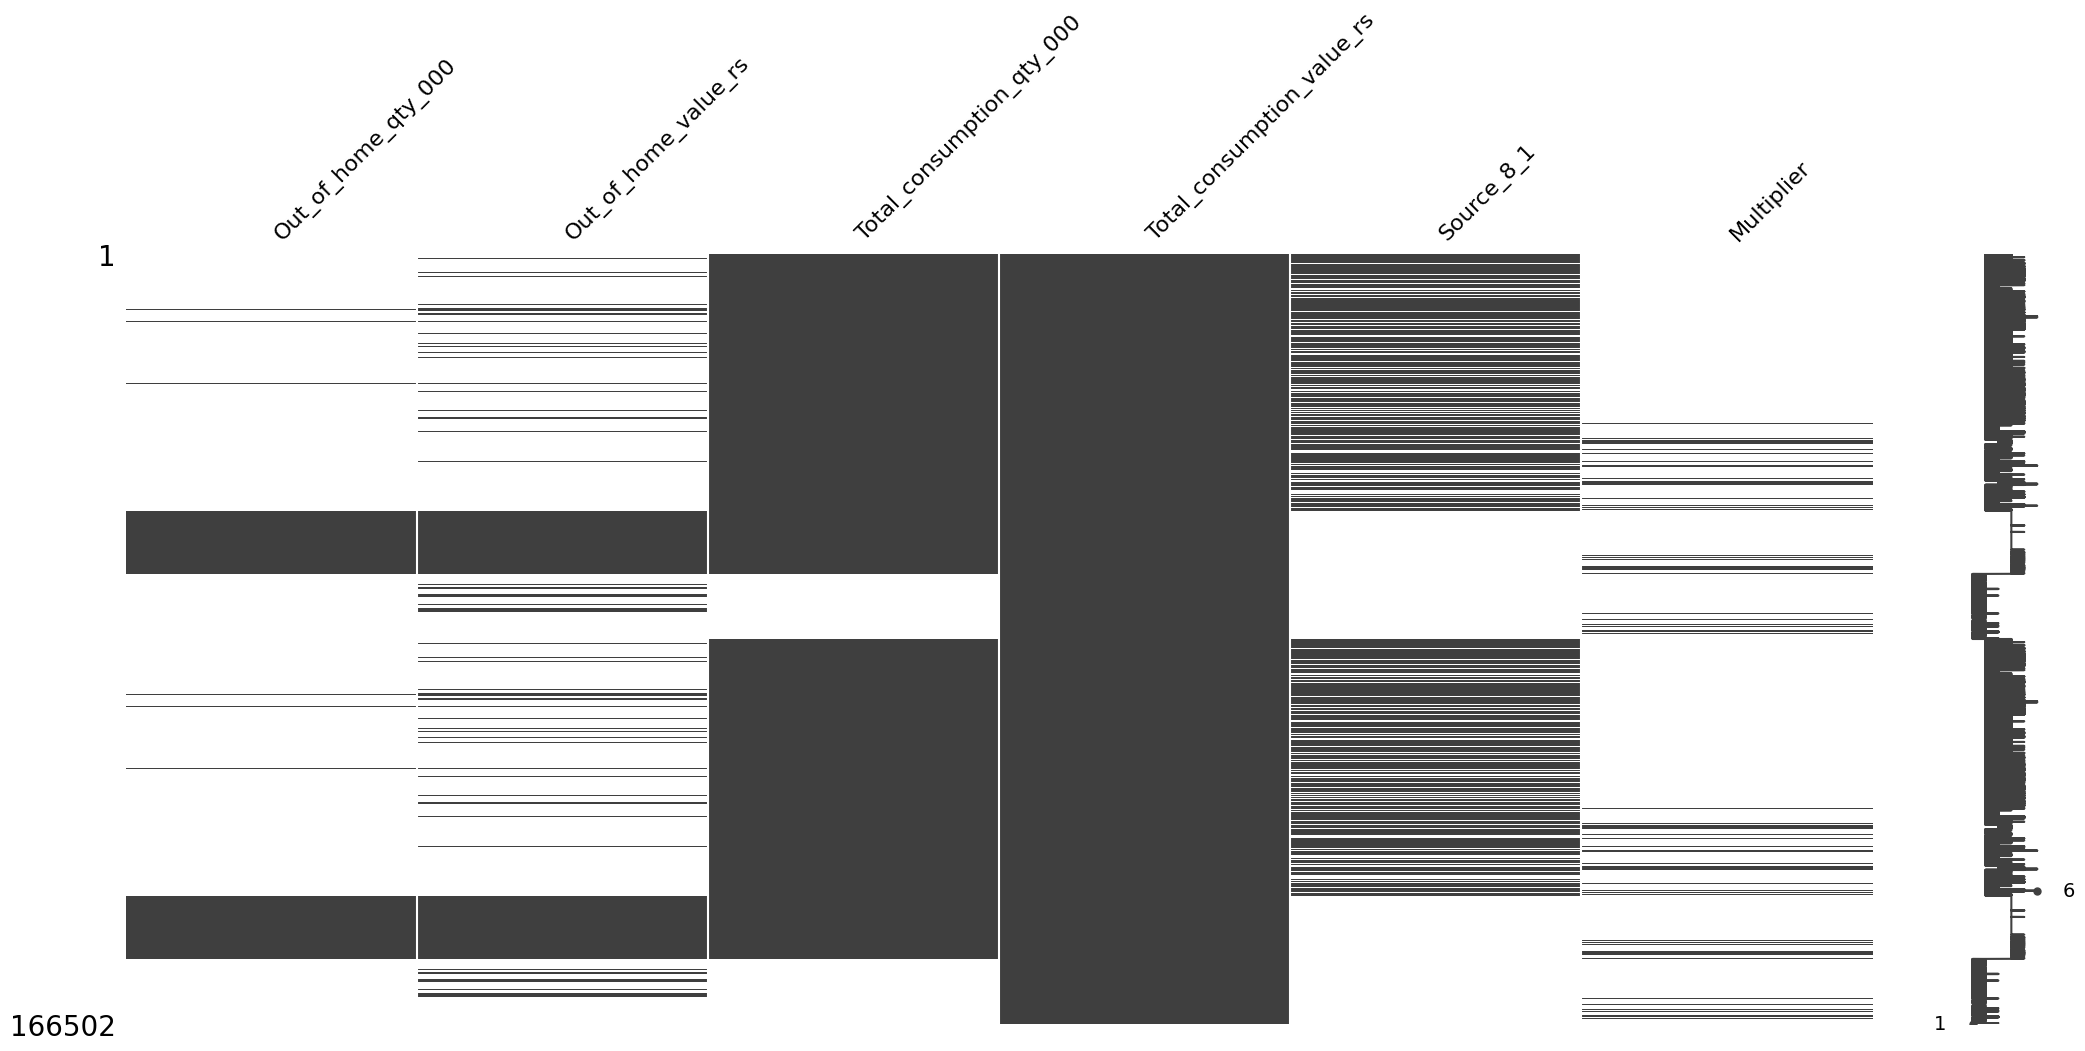

In [2]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-08\data\lev-08_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================

cols = [
'Out_of_home_qty_000',
'Out_of_home_value_rs',
'Total_consumption_qty_000',
'Total_consumption_value_rs',
'Source_8_1',
'Multiplier',
]

pdf = pdf[cols]

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)